# **TELCO CUSTOMER CHURN**

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

Objective Statement :
*   Predict behavior to retain customers
*   Focused customer retention programs

Business Benefit :
*   Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream

The process to do with this project are :
1.   Import libraries and load the data
2.   Data cleansing (missing value and duplicate rows handling), Exploratory data analysis (EDA) which consists of preliminary look at the data, and data deep-dive understanding (statistical summary, univariate analysis, multivariate analysis)

Dataset Informations :
*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents













# Import Libraries and Load Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data from dataset : "https://www.kaggle.com/blastchar/telco-customer-churn"
dftelco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dftelco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1.   `Churn` column is the key (identifier) of the dataset, meaningless to be explored further
2.   All columns, except `SeniorCitizen`, `tenure`, `MonthlyCharges` and `TotalCharges` columns are categorical
3.   The column `Partner`, `Dependents`, `Phone Service`, `Paperless Billing` and `Churn` fields contain two different values ​​(Yes or No)
3.   No obvious defect on the data (column name vs its entries), all looks good




# General Information

In [6]:
# Check information of the data
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.   Dataset contains 21 columns and 7043 rows
2.   The dataset is made up of 3 data types; float, integer and object
3.   Looking at the above dataset, there are 2 float(decimals), 2 integer(whole numbers) and 17 object (categorical) columns/features, but when the data info function was called, `TotalCharges` which is supposed to be a float feature is an object. This was due to collection error. This will be converted to numeric




## Transform dtype column

In [7]:
# Transform TotalCharges column to float
dftelco['TotalCharges']=pd.to_numeric(dftelco['TotalCharges'],errors='coerce')

In [8]:
# Check information of the data after transform column
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



1.   After converting to numeric. `TotalCharges` columns has some missing values
2.   All dtypes are appropriate, given the appropriate column names



# Data Cleansing

## Missing Value Handling

In [9]:
# Check missing value by count and percent
total = dftelco.isna().sum()
percent = dftelco.isna().sum() * 100 / len(dftelco)
missing_value = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_value.head(21)

,Total,%
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000


1.   The above shows the missing values in `TotalCharges` after converting to numeric. 11 values are missing. The next thing to do is drop the rows with missing values since we don't know their original values
2.   Since number of rows with missing values are small in proportion (< 5%), we can simply drop

## Drop Missing Value

In [10]:
# drop na values
dftelco = dftelco.dropna()

In [11]:
# sanity check
dftelco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Success removing NULL values! :)

## Duplicated Values

In [12]:
# number of duplicated data
dftelco.duplicated().sum()

0

Good, No duplication of values ​​in each row

In [13]:
# Check information of the data after drop missing value
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


After dropping, we are left with a total number of 7032 rows/entries



# Exploratory Data Analysis (EDA) with interpretations

## Statistical Summary

In [14]:
# Check information of the data
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [15]:
# Group column based on type
cats = ['customerID','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
nums = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
# Numerical statistical summary
dftelco[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


1.   `SeniorCitizen` is boolean column
2.   Overall, the minimum and maximum values ​​make sense for each column
3.   The absence of a column showing a symmetrical distribution
4.   The `tenure` and `TotalCharges` columns show a positive skew distribution, because mean > median
5.   Column `MonthlyCharges` shows a negative skewed distribution, because mean < median

In [17]:
# Describe method on categorical data
dftelco[cats].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


1.  The `customerID` column has a very large unique or more than 15, can be dropped if want to do modeling
2.  Column `gender` has 2 unique, namely "Male and Female"
3.  The `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` and `Churn` columns have 2 unique values, namely "Yes and No"
4.  The other column has 3 unique with various values ​​from each column

In [18]:
# Showing the precise value counts
for col in cats:
  print(f'value counts of {col} column')
  print(dftelco[col].value_counts(), '\n')

value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

1.  Changing "No phone service" to just "No" in `MultipleLines` columns. Because, "No phone service" means that the customer does not use phone service
2.  Changing "No internet service" to just "No" in `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` and `StreamingMovies` columns. Because, "No internet service" means the customer does not use internet service

In [19]:
# Changing the value
dftelco.loc[dftelco['MultipleLines']=='No phone service','MultipleLines']='No'
dftelco.loc[dftelco['OnlineSecurity']=='No internet service','OnlineSecurity']='No'
dftelco.loc[dftelco['OnlineBackup']=='No internet service','OnlineBackup']='No'
dftelco.loc[dftelco['DeviceProtection']=='No internet service','DeviceProtection']='No'
dftelco.loc[dftelco['TechSupport']=='No internet service','TechSupport']='No'
dftelco.loc[dftelco['StreamingTV']=='No internet service','StreamingTV']='No'
dftelco.loc[dftelco['StreamingMovies']=='No internet service','StreamingMovies']='No'
dftelco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3119,5307-DZCVC,Female,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.95,2628.60,Yes
1398,3569-EDBPQ,Female,0,No,No,24,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,84.35,1938.05,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No,...,No,No,No,No,One year,No,Bank transfer (automatic),19.80,202.25,No
878,7945-HLKEA,Female,0,No,No,60,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,64.75,4039.50,No
6783,9867-XOBQA,Female,0,No,Yes,21,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,53.15,1183.20,No


In [20]:
# Checking value count after changing the value
for col in cats:
  print(f'value counts of {col} column')
  print(dftelco[col].value_counts(), '\n')

value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

value counts of MultipleLines column
No     4065
Yes    2967
Name: MultipleLines, dtype: int64 

value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

value counts of OnlineSecurity column
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64 

value counts of OnlineBackup column
No     4607
Ye

Good, the values has been changed

## Univariate analysis

In [21]:
# Group categoricals column based on information
catsservices = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
catsaccount = ['Contract', 'PaymentMethod', 'PaperlessBilling']
catsdemographic = ['gender', 'Partner', 'Dependents', 'Churn']

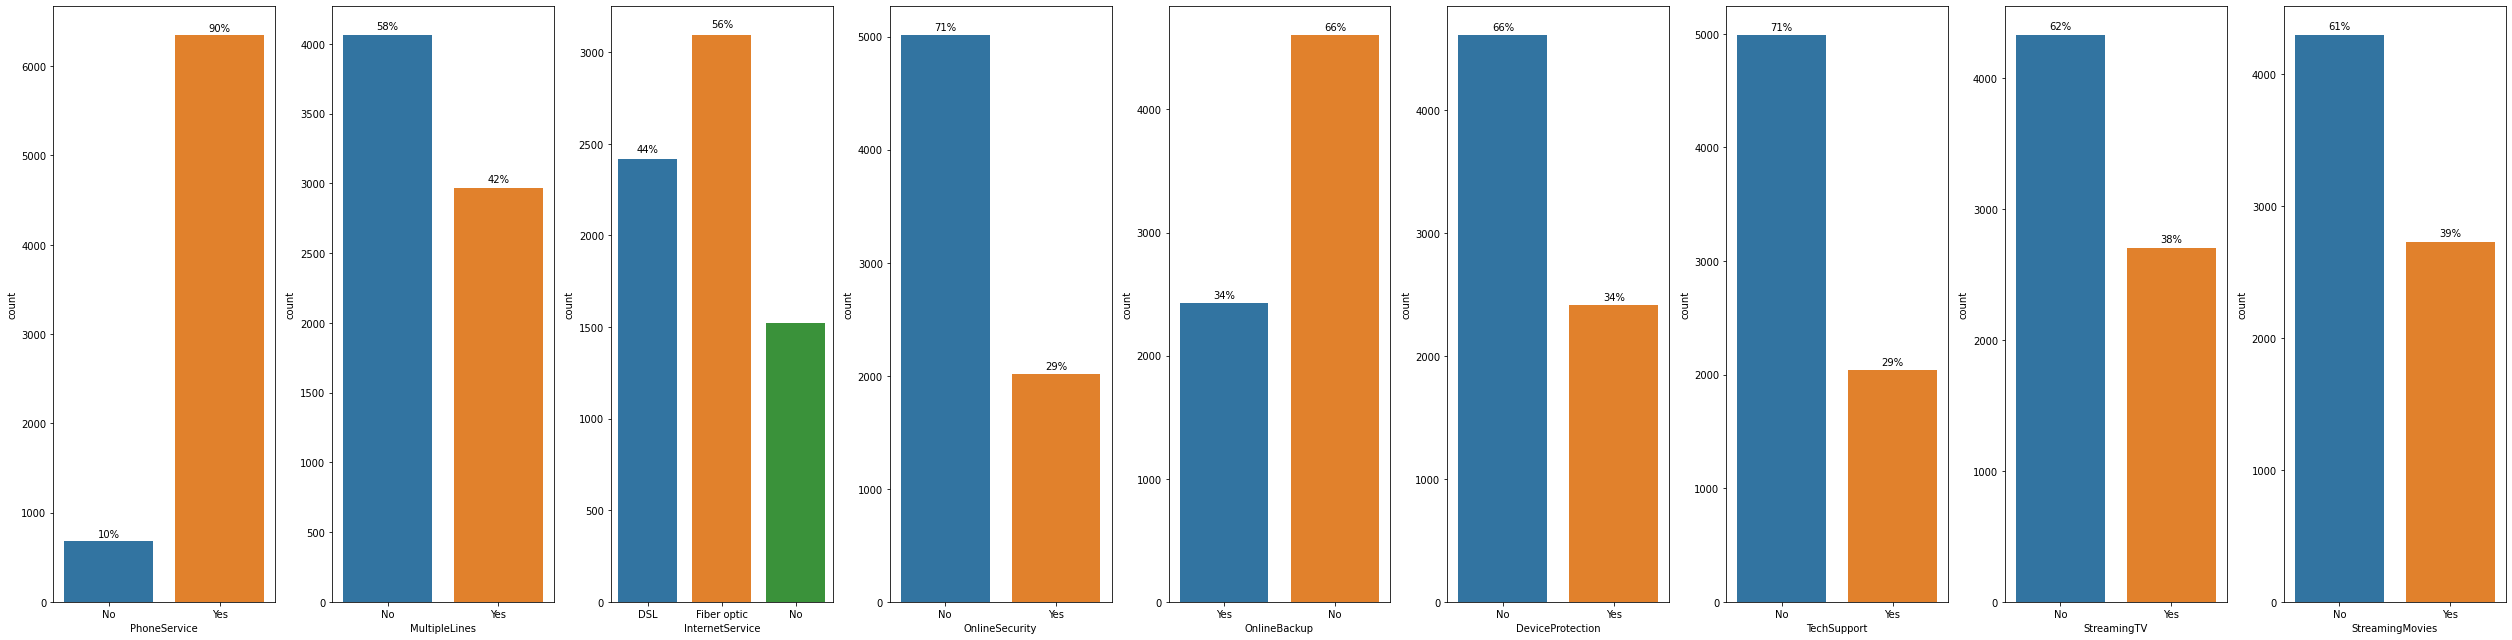

In [22]:
# Check plotting for features of services categoricals
features = catsservices
plt.figure(figsize=(35, 9))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    ax = sns.countplot(data=dftelco,
                       x=features[i])

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    plt.tight_layout()

1.  Almost all users use `PhoneService`
2.  Most users don't use `MultipleLines`
3.  `InternetService` on users using "Fiber Optic" more than "DSL"
4.  `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` have a similar distribution
5.   `StreamingTV` and `StreamingMovies` have a similar distribution

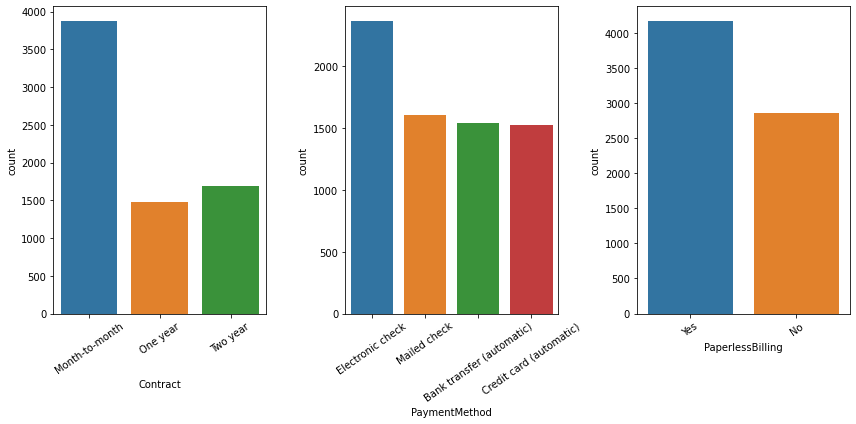

In [23]:
# Check plotting for features of account categoricals
plt.figure(figsize=(12, 6))
features = catsaccount
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=dftelco[features[i]])

    plt.xticks(rotation=35)
    plt.tight_layout()

1.  `Contract` on users with "One Year and Two Year" has 2 times less than "Month to month"
2.  `PaymentMethod` for users who use "Electronic checks" more than others
`PaymentMethod` for users using "Mailed checks". So, "Bank transfers" and "credit cards" has almost the same distribution
3.   Most users prefer `PaperlessBilling`

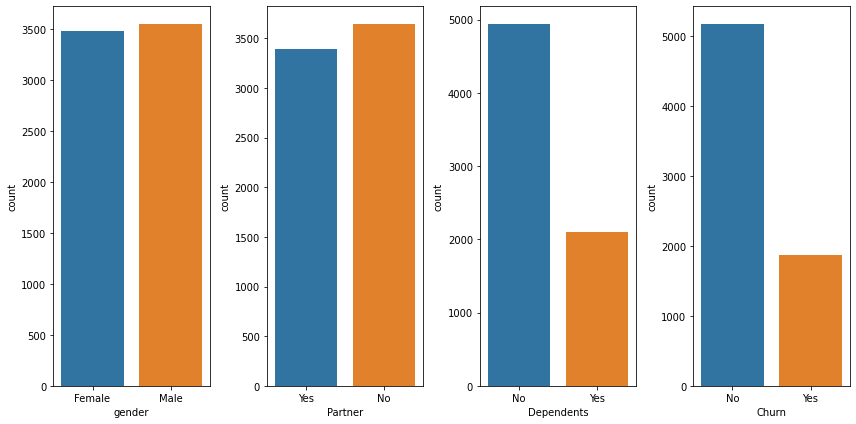

In [24]:
# Check plotting for features of demographic categoricals
plt.figure(figsize=(12, 6))
features = catsdemographic
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(data=dftelco,
                       x=features[i])

    plt.tight_layout()

1.  The ratio on `gender` is about 50/50
2.  The ratio on `Partner` is about 52/48
3.  Users who do not have `Dependents` two times more than users who have `Dependents`
4.  Users who chose `Churn` almost half of the number of users

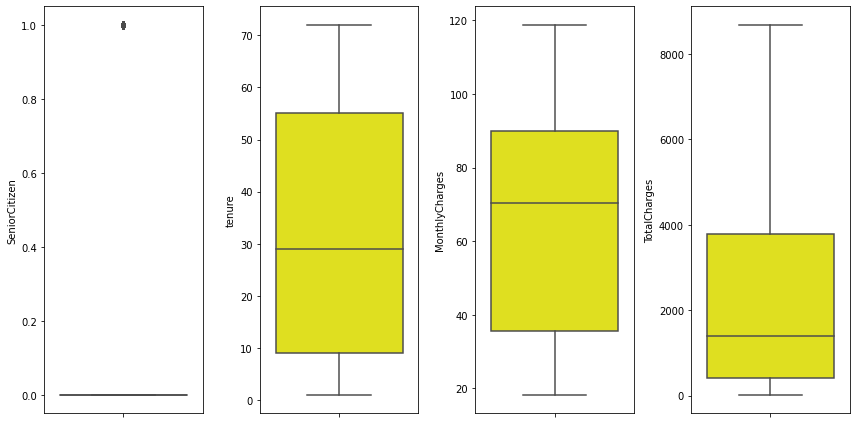

In [25]:
# Check plotting for features of numericals
plt.figure(figsize=(12, 6))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dftelco[features[i]], color='yellow')
    plt.tight_layout()

In [26]:
# Check outlier in max for "SeniorCitizen" column
outlier = dftelco['SeniorCitizen'].max()
dftelco[dftelco['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


The `SeniorCitizen` column has some outliers, but the outliers are normal. Therefore, there is no need to drop the outlier

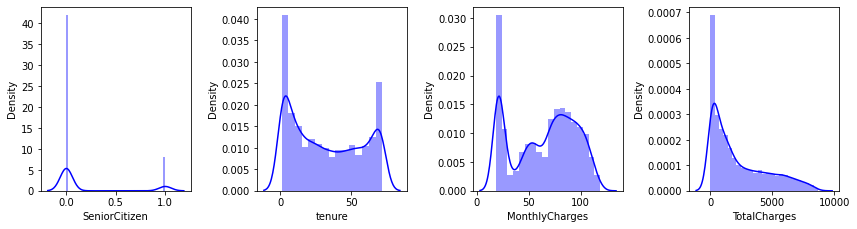

In [27]:
# Check distibution for features of numericals
plt.figure(figsize=(12, 6))
features = nums
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x = dftelco[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

1.  `SeniorCitizen` has a boolean value of 0 and 1
2.  `TotalCharges` has a positive skew

## Multivariate Analysis

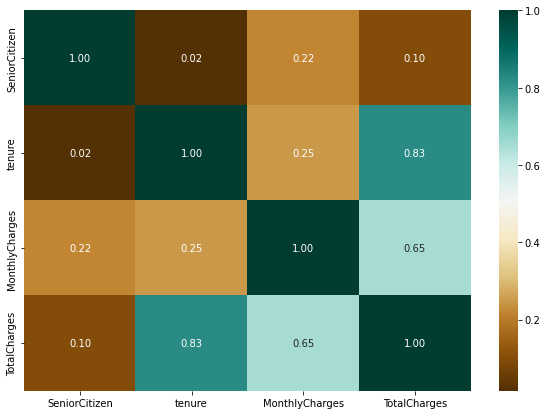

In [28]:
# Check correlation heatmap
correlation = dftelco.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG')

Column `tenure` and `TotalCharges` are highly correlated with each other

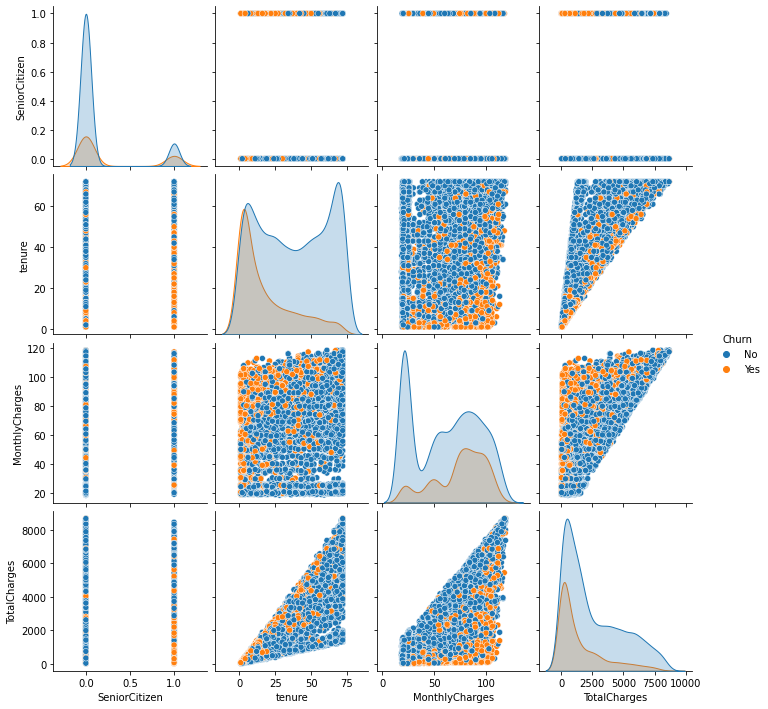

In [29]:
#Pair Plot
sns.pairplot(dftelco, hue='Churn')

1.  If a customer is a `SeniorCitizen` he/she is less likely to leave than if he is not a `SeniorCitizen`
2.  Column `tenure`, we can't say anything about the churn if the customer is new but old customers are less likely to leave
3.  If the `MonthlyCharges` are low, the customre is likely to retian
4.  Both the kde plots have same shape and kind of equidistant from each other hence `TotalCharges` does not influence the Churn

# Deep-Dive Exploration

## Business Question

1.  What are top contracts have the longest tenor with the most total bills? is it churn or not?
2.  What are top payment of method have churned based on gender?
3.  What are top payment of method the customers used? Which payment of method has the most total bills?

## Answer Data

### 1. Top contracts have the longest tenor with the most total bills

In [48]:
# Top contract have the longest tenor with the most total bills, churn or not?
TopContract = (dftelco
            .groupby(['Contract','Churn'])
            .agg(LongestTenure=('tenure', 'max'),
                 TotalBills=('TotalCharges','sum'))
            .reset_index()
            .sort_values('TotalBills',ascending=False)
            .head(6)
            )
TopContract

,Contract,Churn,LongestTenure,TotalBills
4,Two year,No,72,6022500.25
2,One year,No,72,3792062.30
0,Month-to-month,No,72,3378679.25
1,Month-to-month,Yes,71,1927182.25
3,One year,Yes,72,674991.20
5,Two year,Yes,72,260753.45


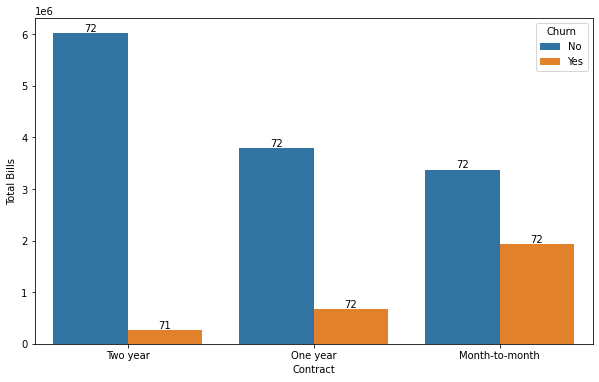

In [49]:
# Check barplot
df = TopContract
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(data=df, x='Contract', y='TotalBills', hue='Churn')
ax.set_ylabel("Total Bills")
rects = ax.patches

# Make some labels with "LongestTenure"
labels = df['LongestTenure'].astype(int)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

1.  `Contract` "two year" and "one year" have the longest `Tenure` with the most `TotalCharge` is the lower `Churn`
2.  `Contract` "month to month" have the longest `Tenure` with the most `TotalCharge` is the higt `Churn` rate

### 2.  Top payment of method have churned based on gender

In [42]:
# Filter churn base on yes
Churned = dftelco['Churn'].isin(['Yes'])
dftelco[Churned]

# Top payment of method based on gender
CountChurned = (dftelco
         .groupby(['PaymentMethod', 'gender'])
         .agg(Churned=('Churn','count'))
         .reset_index()
         .sort_values('Churned',ascending=False)
         .head(10)
         )
CountChurned

,PaymentMethod,gender,Churned
5,Electronic check,Male,1195
4,Electronic check,Female,1170
7,Mailed check,Male,829
0,Bank transfer (automatic),Female,787
6,Mailed check,Female,775
3,Credit card (automatic),Male,770
1,Bank transfer (automatic),Male,755
2,Credit card (automatic),Female,751


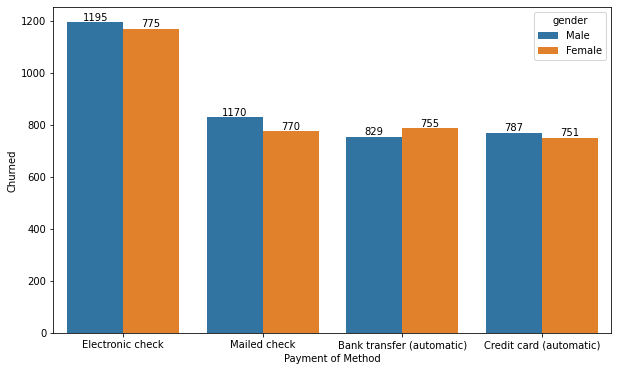

In [43]:
# Check barplot
dfchurned = CountChurned
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(data=dfchurned, x='PaymentMethod', y='Churned', hue='gender')
ax.set_xlabel("Payment of Method")
rects = ax.patches

# Make some labels with "Churned"
labels = dfchurned['Churned']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

Electronic check is the `PaymentMethod` with the most churned based on male `gender`

### 3.  Top payment of method customer used has the most total bills

In [44]:
# Top payment of method customer used has the most total bills
TopPM = (dftelco
            .groupby(['PaymentMethod', 'customerID'])
            .agg(TotalBills=('TotalCharges', 'sum'))
            .reset_index()
            .sort_values('TotalBills',ascending=False)
            )
TopPM

,PaymentMethod,customerID,TotalBills
454,Bank transfer (automatic),2889-FPWRM,8684.80
1192,Bank transfer (automatic),7569-NMZYQ,8672.45
3025,Credit card (automatic),9739-JLPQJ,8670.10
3031,Credit card (automatic),9788-HNGUT,8594.40
5173,Electronic check,8879-XUAHX,8564.75
...,...,...,...
5641,Mailed check,1423-BMPBQ,19.00
7026,Mailed check,9975-SKRNR,18.90
6919,Mailed check,9318-NKNFC,18.85
5194,Electronic check,8992-CEUEN,18.85


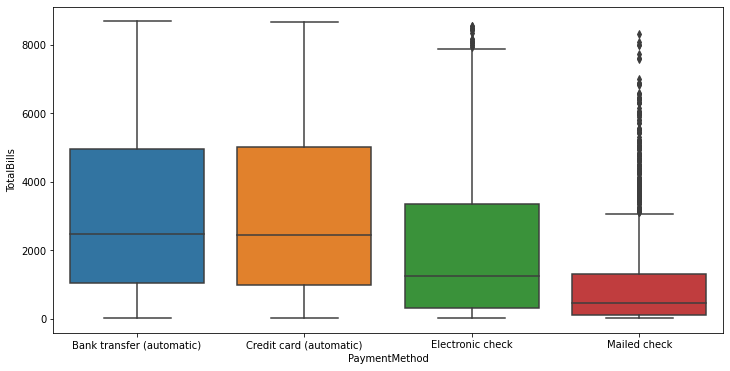

In [45]:
# Check boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=TopPM,
            x='PaymentMethod',
            y='TotalBills',)

"Bank transfer" and "Credit card" is the `PaymentMethod` with the most `TotalCharge`

# Conclutions
*   All features in the dataset are used to
analysing
*   A lot of monthly subscribers chose to continue using the company's service, also, a lot of them were not satisfied, they churned
*   Customers who did yearly (one year and two year) subscription were satisfied with the company's service



# Recommendations

Giving discounts to customers who subscribe to monthly allows the reduction for customers to leave and the churned to be lower. Upgrading customers' subscriptions would mean more income for the company.